# Imports

In [1]:
import wrangle as wr
import explore as ex
import stats_conclude as sc
import evaluate as ev

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from sklearn.model_selection import train_test_split

import sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector

np.random.seed(123)

import warnings
warnings.filterwarnings("ignore")
import os

Imports Loaded Successfully


# Acquire

* 6 different CSV's imported from Jeff's local system using his credentials
* 1 CSV's kept for analysis
    * Invoice Profit Summary
<br>
* 1 .XLSX used for summary purposes
    * Summary
---

# Prepare

## Invoice Profit Summary
---
* 10880 rows × 12 columns **before** cleaning
* 10878 rows × 10 columns **after** cleaning
    * no nulls
    * the read_csv imported all columns as objects
        * dropped first two customers with indexes -1 and 0
        * changed date column to datetime
        * dropped percent_profit and amount_profit (derived columns)
        * changed from parts_cost:sale_total to floats and rounded to 2
* Contains: 
    * 'invoice' = *index* and **started at -1**
    * 'date': date of invoice sale
    * 'customer': name of customer
    * 'percent_profit': ***drop***
    * 'amount_profit': ***drop***
    * 'parts_cost': shop cost for parts
    * 'labor_cost': shop cost for labor
    * 'sublet_cost': work outsourced
    * 'total_cost': total shop cost
    * 'parts_sale': shop profit for parts
    * 'labor_sale': shop profit for labor
    * 'sublet_sale': work insourced
    * 'sale_total': total shop profit
    
* Remove Outliers
---
**Cost**: Shop **Credit**

**Sale**: Shop **Debit**

**Sublet**: Contracted Work (In/Out)

In [2]:
# get data
df_invoice = wr.get_data('invoice_profit_summ')
df_invoice

CSV File Found, Loading...


,date,customer,percent_profit,amount_profit,parts_cost,labor_cost,sublet_cost,total_cost,parts_sale,labor_sale,sublet_sale,sale_total
invoice,,,,,,,,,,,,
-1,4/1/14,"Owens, Bob",96.9,247.1,7.79,0,0,7.79,17.89,237,0,254.89
0,4/1/14,"Poole, Bill",100,150.1,0,0,0,0,0,150.1,0,150.1
1,4/2/14,"Williams, Arlene",76,173.36,54.86,0,0,54.86,109.72,118.5,0,228.22
2,4/1/14,"Higgins, Ryan",65.5,33.34,17.59,0,0,17.59,27.22,23.7,0,50.92
3,4/2/14,Dept. of Corrections,55.8,199.88,158.02,0,0,158.02,239.4,118.5,0,357.9
...,...,...,...,...,...,...,...,...,...,...,...,...
11328,5/31/23,"Beck, Rich",60.7,411.86,140.9,125.89,0,266.79,257.45,421.2,0,678.65
11329,5/31/23,"Culbertson, Bill",62.9,45.12,26.62,0,0,26.62,40.74,31,0,71.74
11330,5/31/23,UTV,100,680,0,0,0,0,0,680,0,680


In [3]:
# clean the data
df_invoice = wr.prep_invoice(df_invoice)
df_invoice

DataFrame acquired, cleaning...
Changed date to datetime type
Dropped percent and amount profit columns
Changed remining columns to floats, round to 2
DateFrame cleaned and ready for exploration


,date,customer,parts_cost,labor_cost,sublet_cost,total_cost,parts_sale,labor_sale,sublet_sale,sale_total,invoice
0,2014-04-02,"Williams, Arlene",54.86,0.00,0.0,54.86,109.72,118.5,0.0,228.22,1
1,2014-04-01,"Higgins, Ryan",17.59,0.00,0.0,17.59,27.22,23.7,0.0,50.92,2
2,2014-04-02,Dept. of Corrections,158.02,0.00,0.0,158.02,239.40,118.5,0.0,357.90,3
3,2014-04-03,"Grubb , Denny",47.01,0.00,0.0,47.01,92.59,268.6,0.0,361.19,4
4,2014-04-07,"Norland, Gary",420.09,0.00,0.0,420.09,526.77,197.5,0.0,724.27,5
...,...,...,...,...,...,...,...,...,...,...,...
10873,2023-05-31,"Beck, Rich",140.90,125.89,0.0,266.79,257.45,421.2,0.0,678.65,11328
10874,2023-05-31,"Culbertson, Bill",26.62,0.00,0.0,26.62,40.74,31.0,0.0,71.74,11329
10875,2023-05-31,UTV,0.00,0.00,0.0,0.00,0.00,680.0,0.0,680.00,11330
10876,2023-05-31,"Lopez, Sheryl",154.99,95.42,0.0,250.41,309.98,302.4,0.0,612.38,11331


In [4]:
# removed outliers
df_invoice = ex.remove_model_outliers(df_invoice)

Date is excluded from this function.
Customer is excluded from this function.
Invoice is excluded from this function.
-----------------------------------------
Outliers Calculated with IQR Ranges, multiplier 1.5
Parts cost between -148.66 and 289.54
Labor cost between -57.34 and 95.57
Sublet cost between 0.0 and 0.0
Total cost between -184.3 and 373.86
Parts sale between -258.45 and 513.82
Labor sale between -228.75 and 477.25
Sublet sale between 0.0 and 0.0
Sale total between -447.26 and 969.7

Outliers Removed: Percent Original Data Remaining: 93.0



In [5]:
df_invoice.dtypes

date           datetime64[ns]
customer               object
parts_cost            float64
labor_cost            float64
sublet_cost           float64
total_cost            float64
parts_sale            float64
labor_sale            float64
sublet_sale           float64
sale_total            float64
invoice                object
dtype: object

# Univariate Exploration

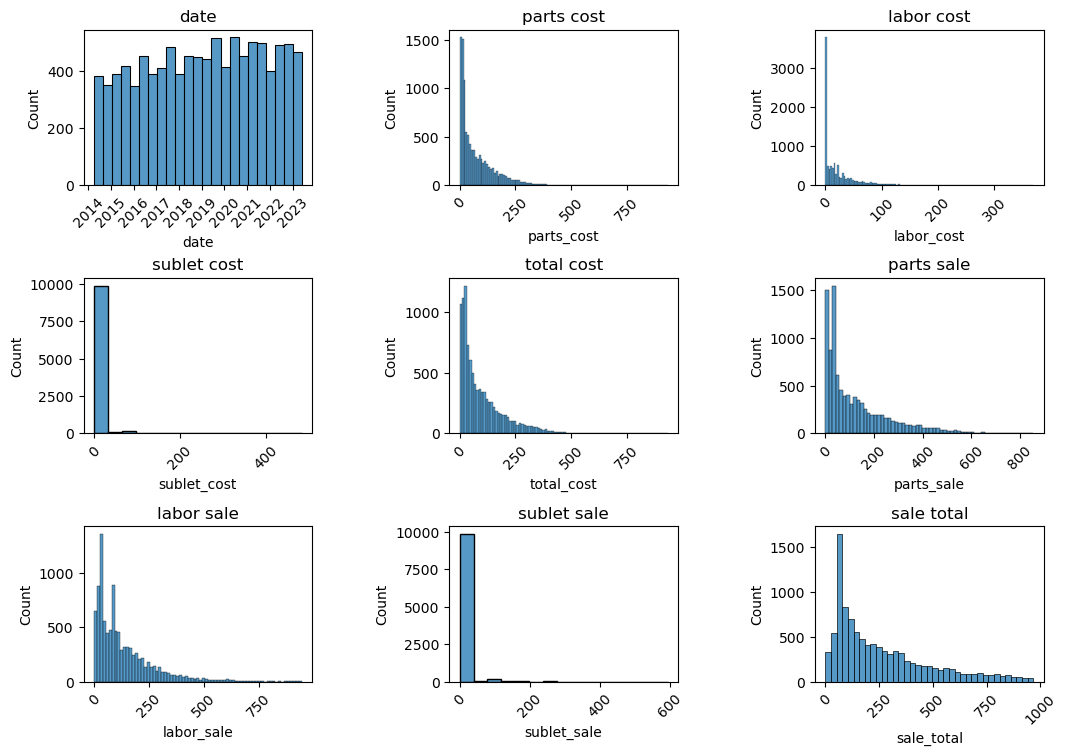

In [6]:
ex.univariate_hist(df_invoice.drop(columns={'customer','invoice'}))

In [7]:
ex.univariate_desc(df_invoice)

count                   10138
unique                   2330
top       2021-06-30 00:00:00
freq                       14
first     2014-04-01 00:00:00
last      2023-05-31 00:00:00
Name: date, dtype: object


count                         10138
unique                         2378
top       H&H BUSINESS SYSTEMS, INC
freq                            145
Name: customer, dtype: object


count    10138.000000
mean        70.774229
std         78.403588
min          0.000000
25%         14.800000
50%         40.415000
75%        107.365000
max        932.790000
Name: parts_cost, dtype: float64


count    10138.000000
mean        22.273946
std         31.368960
min          0.000000
25%          0.000000
50%         11.660000
75%         31.800000
max        369.250000
Name: labor_cost, dtype: float64


count    10138.000000
mean         2.135325
std         15.713313
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        483.950000
Name: sublet_cost,

# Preprocessing

## Train, Validate, Test Split

* NON-STRATIFY FOR REGRESSION

* remove outliers for scaling and modeling

In [8]:
df_model = df_invoice

In [9]:
df_model.dtypes

date           datetime64[ns]
customer               object
parts_cost            float64
labor_cost            float64
sublet_cost           float64
total_cost            float64
parts_sale            float64
labor_sale            float64
sublet_sale           float64
sale_total            float64
invoice                object
dtype: object

In [10]:
train, validate, test = ex.split_regression(df_invoice)

Prepared DF: (10138, 11)
Train: (6082, 11)
Validate: (2028, 11)
Test: (2028, 11)


In [11]:
train_model, validate_model, test_model = ex.split_regression(df_model.drop(columns={'date','customer','invoice'}))

Prepared DF: (10138, 8)
Train: (6082, 8)
Validate: (2028, 8)
Test: (2028, 8)


## Standard Scaler

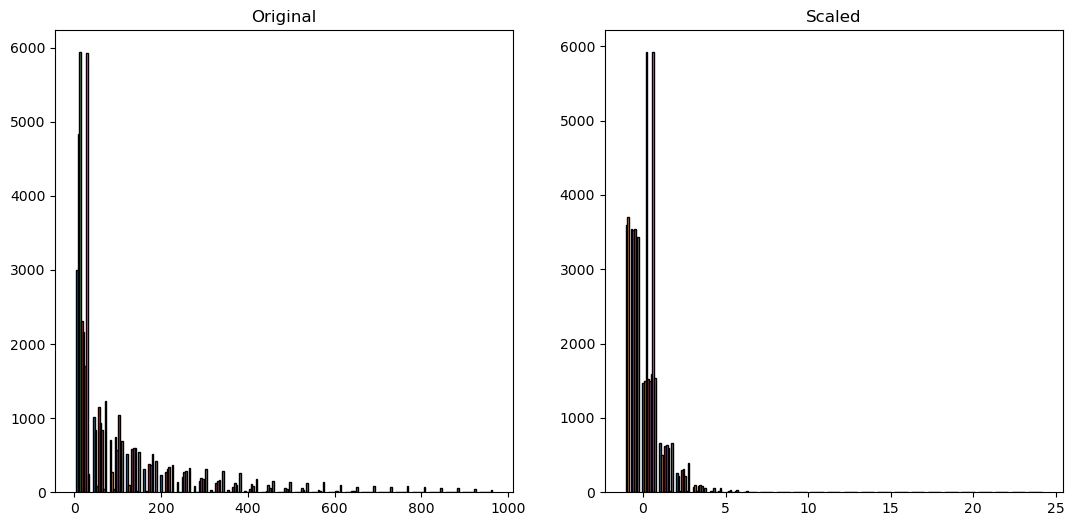

In [12]:
train_std_scaled, validate_std_scaled, test_std_scaled = ex.standard_scaler(train_model, validate_model, test_model)

# Mulitvariate Exploration

> ***Working in df_invoice for readability***

---

**Questions**

1. Is there a relationship between labor sale and parts sale?
2. Is there a relationship labor cost and parts cost?
3. Is the mean of parts cost equal to the mean of parts sale?
4. Is the mean of labor cost equal to the mean of labor sale?

In [13]:
df_invoice

,date,customer,parts_cost,labor_cost,sublet_cost,total_cost,parts_sale,labor_sale,sublet_sale,sale_total,invoice
0,2014-04-02,"Williams, Arlene",54.86,0.00,0.0,54.86,109.72,118.5,0.0,228.22,1
1,2014-04-01,"Higgins, Ryan",17.59,0.00,0.0,17.59,27.22,23.7,0.0,50.92,2
2,2014-04-02,Dept. of Corrections,158.02,0.00,0.0,158.02,239.40,118.5,0.0,357.90,3
3,2014-04-03,"Grubb , Denny",47.01,0.00,0.0,47.01,92.59,268.6,0.0,361.19,4
4,2014-04-07,"Norland, Gary",420.09,0.00,0.0,420.09,526.77,197.5,0.0,724.27,5
...,...,...,...,...,...,...,...,...,...,...,...
10873,2023-05-31,"Beck, Rich",140.90,125.89,0.0,266.79,257.45,421.2,0.0,678.65,11328
10874,2023-05-31,"Culbertson, Bill",26.62,0.00,0.0,26.62,40.74,31.0,0.0,71.74,11329
10875,2023-05-31,UTV,0.00,0.00,0.0,0.00,0.00,680.0,0.0,680.00,11330
10876,2023-05-31,"Lopez, Sheryl",154.99,95.42,0.0,250.41,309.98,302.4,0.0,612.38,11331


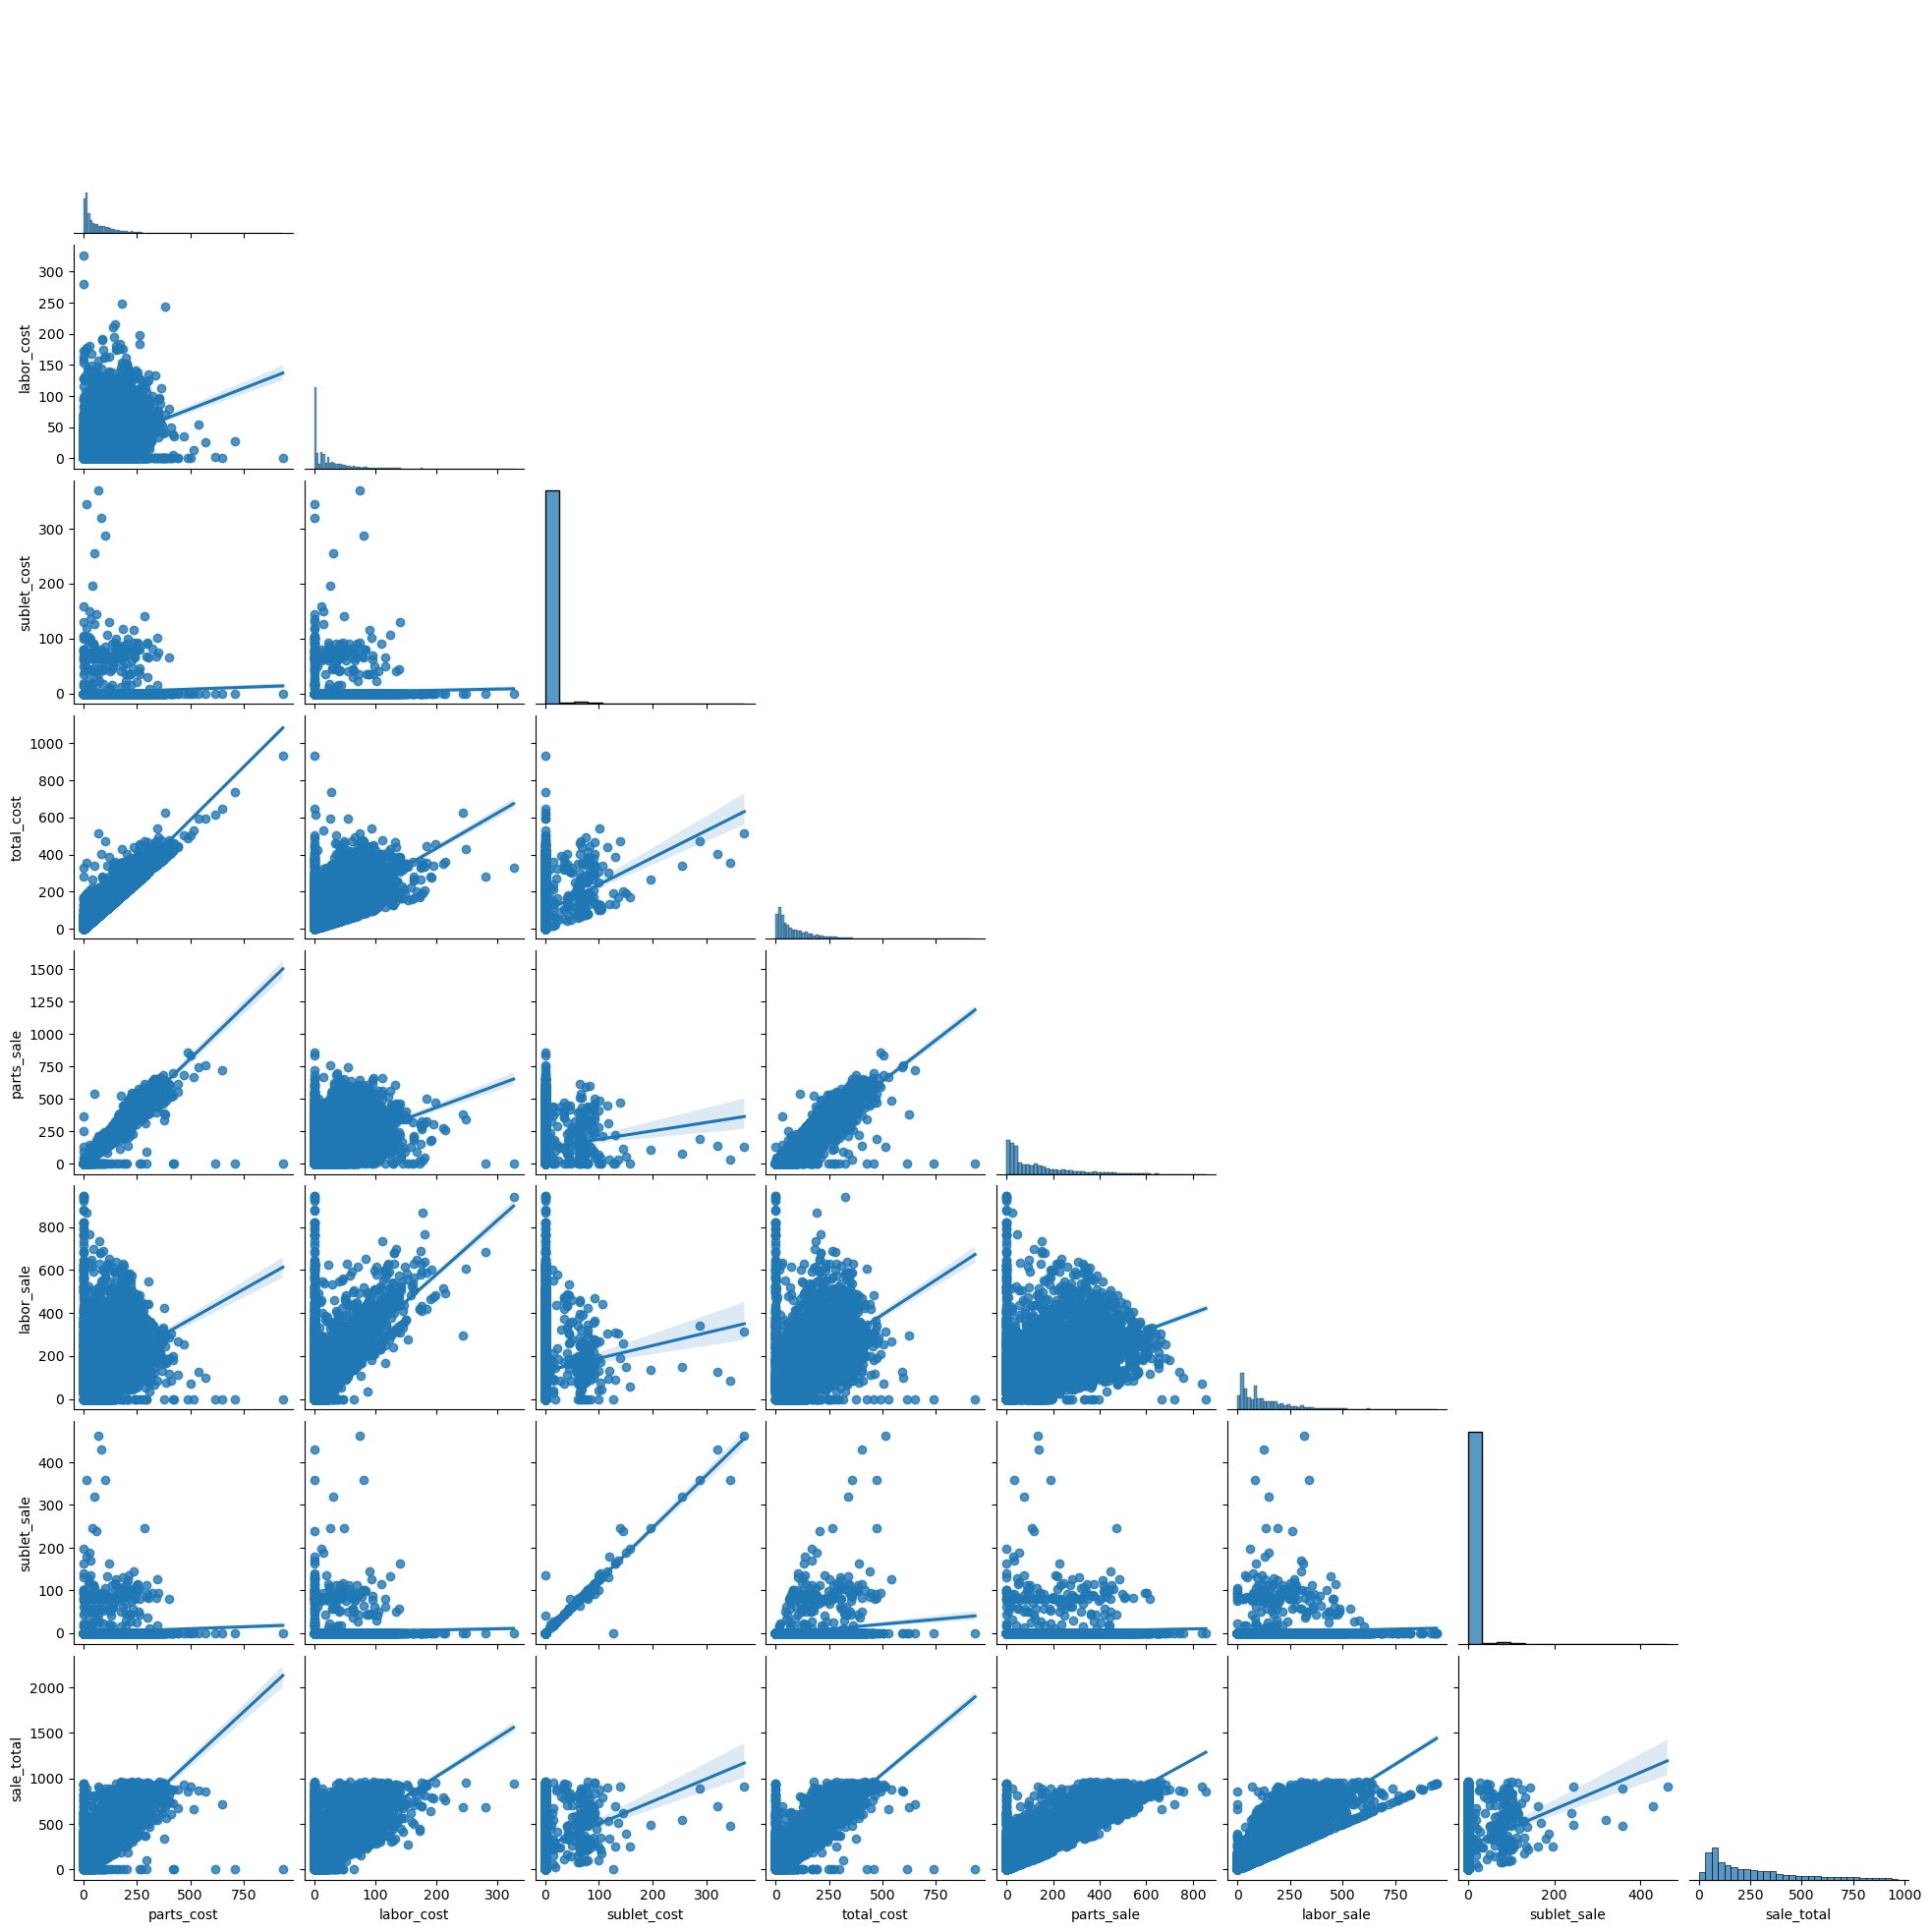

In [14]:
sns.pairplot(data=train,corner=True, kind='reg')
plt.show()

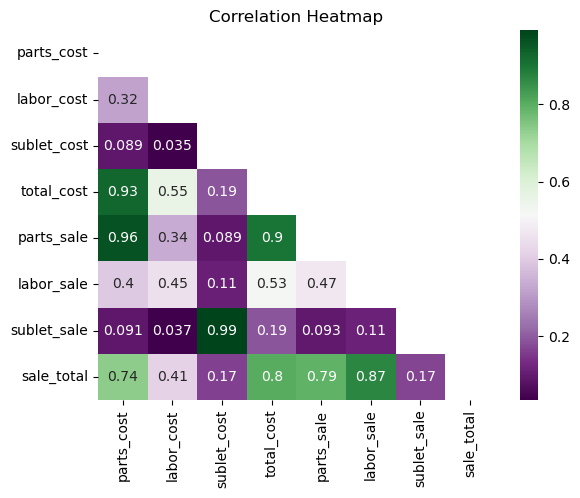

In [15]:
ex.plot_heatmap(train)

## 1. Is there a relationship between labor sale and parts sale?

* Hypothesize
* Visualize
* Analyze
* Summarize

$H_0$: There is no relationship between labor sale and parts sale

$H_a$: There is a relationship between labor sale and parts sale

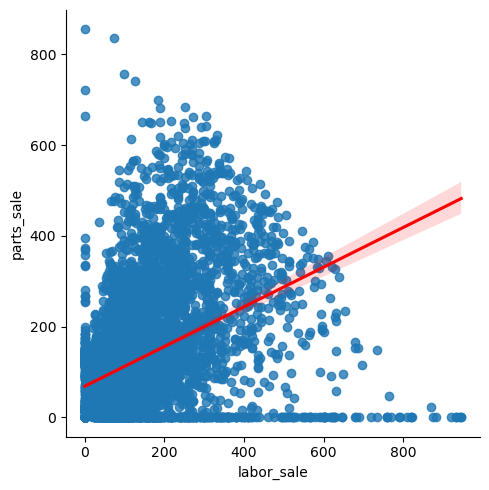

In [16]:
sns.lmplot(data=train, x='labor_sale', y='parts_sale',
          line_kws={'color':'red'})
plt.show()

In [17]:
sc.conclude_spearmanr(train.labor_sale, train.parts_sale)

Non-Parametric data: Spearman's R test successful...
r (correlation value): 0.47057369040584557
p-value: 0.0000000000 < 0.05?
----
We can reject the null hypothesis.


In [18]:
sc.conclude_pearsonr(train.labor_sale, train.parts_sale)

Parametric data: Pearson's R test successful...
r (correlation value): 0.41747825987270726
p-value: 0.0000000000 < 0.05?
----
We can reject the null hypothesis.


## 2. Is there a relationship labor cost and parts cost?

$H_0$: There is no relationship between labor cost and parts cost

$H_a$: There is a relationship between labor cost and parts cost

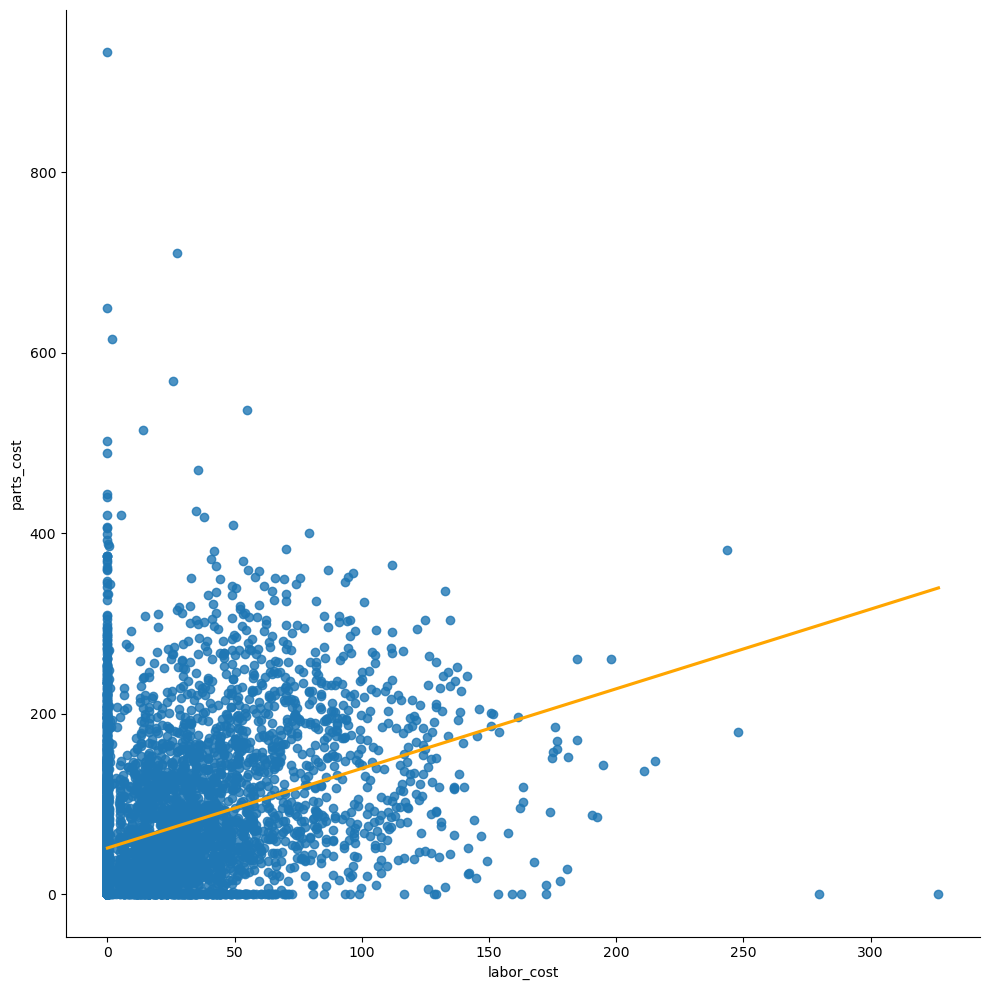

In [19]:
sns.lmplot(data=train, x='labor_cost', y='parts_cost', ci=False, size=10, line_kws={'color':'orange'})
plt.show()

In [20]:
sc.conclude_spearmanr(train.labor_cost, train.labor_sale)

Non-Parametric data: Spearman's R test successful...
r (correlation value): 0.450071017016962
p-value: 0.0000000000 < 0.05?
----
We can reject the null hypothesis.


In [21]:
sc.conclude_pearsonr(train.labor_cost, train.labor_sale)

Parametric data: Pearson's R test successful...
r (correlation value): 0.6060155243515566
p-value: 0.0000000000 < 0.05?
----
We can reject the null hypothesis.


## 3. Is the mean of parts cost equal to the mean of parts sale?

$H_0$: The means are equal between parts cost and parts sale

$H_a$: The means are not equal between parts cost and parts sale

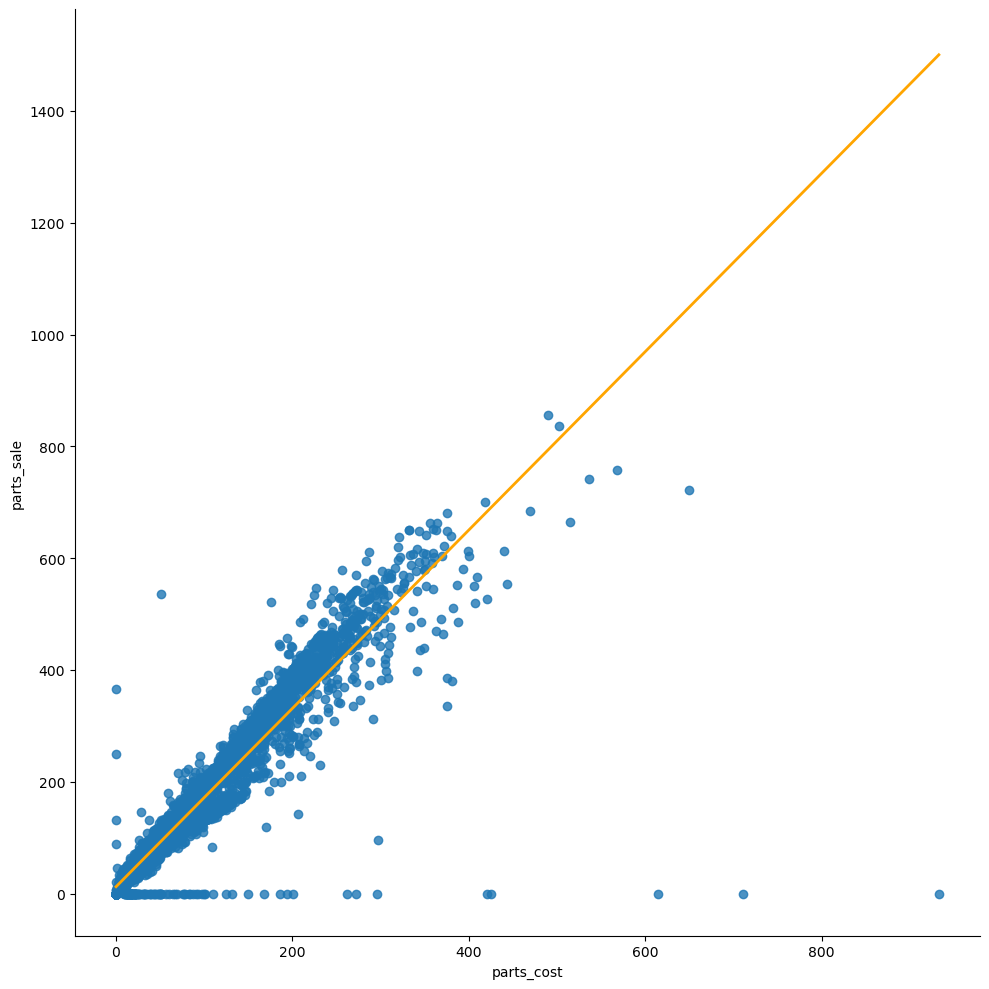

In [22]:
sns.lmplot(data=train, x='parts_cost', y='parts_sale', ci=False, size=10, line_kws=({'color':'orange', 'linewidth':'2'}))
plt.show()

* not normal

In [23]:
sc.conclude_spearmanr(train.parts_cost, train.parts_sale)

Non-Parametric data: Spearman's R test successful...
r (correlation value): 0.9628504029772711
p-value: 0.0000000000 < 0.05?
----
We can reject the null hypothesis.


## 4. Is the mean of labor cost equal to the mean of labor sale?

$H_0$: The means are equal between labor cost and labor sale

$H_a$: The means are not equal between labor cost and labor sale

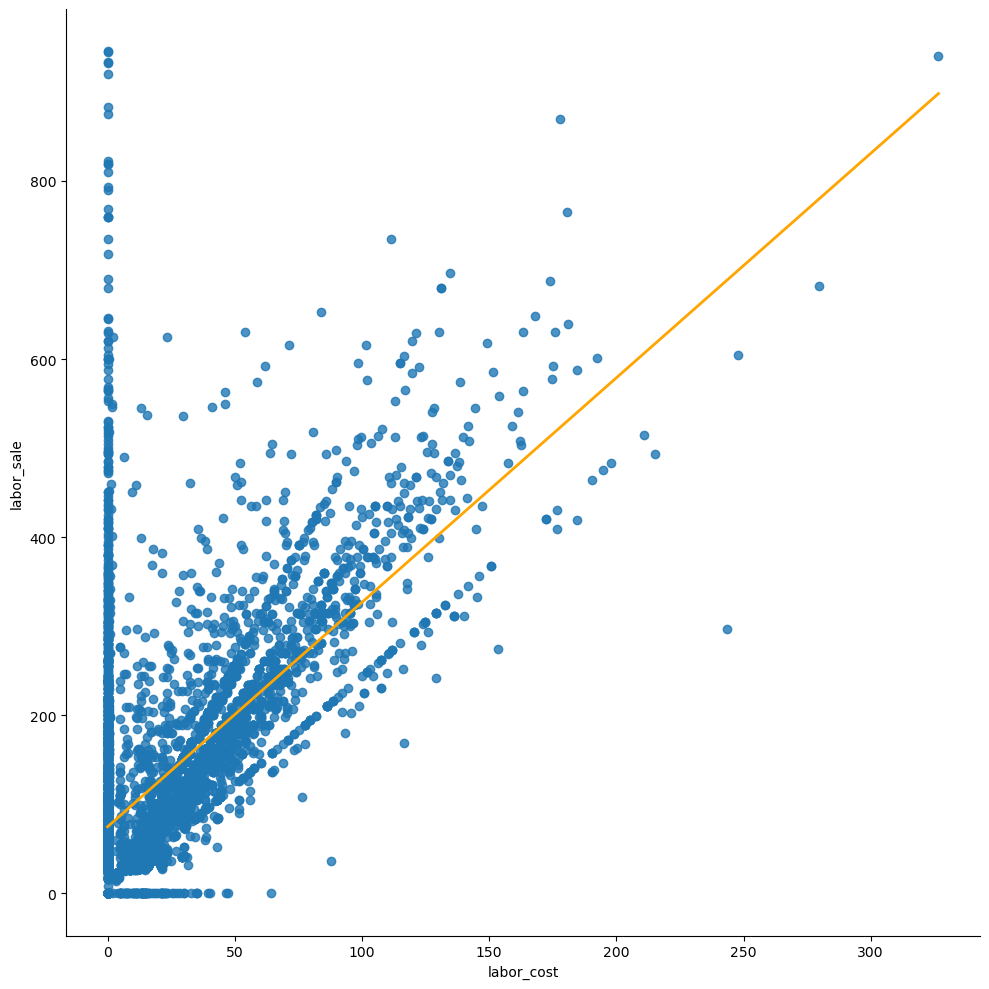

In [24]:
sns.lmplot(data=train, x='labor_cost', y='labor_sale', ci=False,size=10 , line_kws=({'color':'orange', 'linewidth':'2'}))
plt.show()

In [25]:
sc.conclude_spearmanr(train.labor_cost, train.labor_sale)

Non-Parametric data: Spearman's R test successful...
r (correlation value): 0.450071017016962
p-value: 0.0000000000 < 0.05?
----
We can reject the null hypothesis.


## Exploration Takeaways:


* underchanging parts sales (specifically after ~1100)
* labor is average but could be improved...
* Feature engineer: Profit per part and profit per labor hour

# X_train, y_train, X_validate, y_validate, X_test, y_test

In [26]:
def assign_variables(train, validate, test, target):
    """This function takes in the train, validate, and test dataframes and assigns 
    the chosen features to X_train, X_validate, X_test, and y_train, y_validate, 
    and y_test.
    ---
    Format = X_train, X_validate, X_test, y_train, y_validate, y_test = function()
    """
    # X_train, y_train, X_validate, y_validate, X_test, and y_test to be used for feature importance/modeling
    variable_list = []
    X_train = train.drop(columns={target})
    variable_list.append(X_train)
    X_validate = validate.drop(columns={target})
    variable_list.append(X_validate)
    X_test = test.drop(columns={target})
    variable_list.append(X_test)
    y_train = train[target]
    variable_list.append(y_train)
    y_validate = validate[target]
    variable_list.append(y_validate)
    y_test = test[target]
    variable_list.append(y_test)

    return variable_list

In [27]:
X_train, X_validate, X_test, y_train, y_validate, y_test = assign_variables(train, validate, test, 'sale_total')

In [28]:
X_train_scaled, X_validate_scaled, X_test_scaled, y_train_scaled, y_validate_scaled, y_test_scaled\
= assign_variables(train_std_scaled, validate_std_scaled, test_std_scaled, 'sale_total')

In [29]:
X_train_scaled.shape[0], X_train.shape[0]

(6082, 6082)

# Feature Importance

## K Best: 3

* Originally ran with total_cost included: this iteration excludes

In [30]:
# MAKE the thing
kbest = SelectKBest(f_regression, k=3)

# FIT the thing
kbest.fit(X_train_scaled.drop(columns={'total_cost'}), y_train)

SelectKBest(k=3, score_func=<function f_regression at 0x7f82f8f43700>)

In [31]:
# statistical f-value / feature's scores:
kbest.scores_

array([ 8910.14520291,  3240.58136053,   176.14449358, 15429.47258403,
       13522.98011534,   185.73443151])

In [32]:
# p value: 
kbest.pvalues_

array([0.00000000e+00, 0.00000000e+00, 1.19414330e-39, 0.00000000e+00,
       0.00000000e+00, 1.10599694e-41])

In [33]:
kbest.feature_names_in_

array(['parts_cost', 'labor_cost', 'sublet_cost', 'parts_sale',
       'labor_sale', 'sublet_sale'], dtype=object)

In [34]:
kbest_results = pd.DataFrame(
                dict(p_value=kbest.pvalues_, feature_score=kbest.scores_),
                index = X_train_scaled.drop(columns={'total_cost'}).columns)

In [35]:
kbest_results

,p_value,feature_score
parts_cost,0.000000e+00,8910.145203
labor_cost,0.000000e+00,3240.581361
sublet_cost,1.194143e-39,176.144494
parts_sale,0.000000e+00,15429.472584
labor_sale,0.000000e+00,13522.980115
sublet_sale,1.105997e-41,185.734432


In [36]:
# we can apply this mask to the columns in our original dataframe
X_train_scaled.drop(columns={'total_cost'}).columns[kbest.get_support()]

Index(['parts_cost', 'parts_sale', 'labor_sale'], dtype='object')

In [37]:
# return df of features
X_train_scaled_KBtransformed = pd.DataFrame(
    kbest.transform(X_train_scaled.drop(columns={'total_cost'})),
    columns = X_train_scaled.drop(columns={'total_cost'}).columns[kbest.get_support()],
    index=X_train_scaled.drop(columns={'total_cost'}).index
)

In [38]:
X_train_scaled_KBtransformed.head(1)

,parts_cost,parts_sale,labor_sale
0,-0.774588,-0.792642,-0.68096


In [39]:
# # applying the inverse_transform function to the scaled data
# inverse_train_scaled = scaler.inverse_transform(train_scaled)
# inverse_train_scaled

## RFE

In [50]:
# The top two features
all_rankings = ev.rfe(X_train_scaled, y_train, 2)
all_rankings.head(2)

,rfe_ranking
parts_sale,1
labor_sale,1


# Feature Engineering 

* Working in train_model
---
* Sale Total **target**

* Profit Per Part
    * Parts Cost - Parts Sale
<br>    
* Profit Per Labor
    * Labor Cost - Labor Sale
<br>    
* Remove:
    * parts_cost, labor_cost, parts_sale, labor_sale

In [41]:
df_model

,date,customer,parts_cost,labor_cost,sublet_cost,total_cost,parts_sale,labor_sale,sublet_sale,sale_total,invoice
0,2014-04-02,"Williams, Arlene",54.86,0.00,0.0,54.86,109.72,118.5,0.0,228.22,1
1,2014-04-01,"Higgins, Ryan",17.59,0.00,0.0,17.59,27.22,23.7,0.0,50.92,2
2,2014-04-02,Dept. of Corrections,158.02,0.00,0.0,158.02,239.40,118.5,0.0,357.90,3
3,2014-04-03,"Grubb , Denny",47.01,0.00,0.0,47.01,92.59,268.6,0.0,361.19,4
4,2014-04-07,"Norland, Gary",420.09,0.00,0.0,420.09,526.77,197.5,0.0,724.27,5
...,...,...,...,...,...,...,...,...,...,...,...
10873,2023-05-31,"Beck, Rich",140.90,125.89,0.0,266.79,257.45,421.2,0.0,678.65,11328
10874,2023-05-31,"Culbertson, Bill",26.62,0.00,0.0,26.62,40.74,31.0,0.0,71.74,11329
10875,2023-05-31,UTV,0.00,0.00,0.0,0.00,0.00,680.0,0.0,680.00,11330
10876,2023-05-31,"Lopez, Sheryl",154.99,95.42,0.0,250.41,309.98,302.4,0.0,612.38,11331


In [42]:
# # create profit per part engineered column
# df_model['profit_per_part'] = df_model.parts_sale - df_model.parts_cost
# df_model

In [43]:
# # create profit per labor cost
# df_model['profit_per_labor'] = df_model.labor_sale - df_model.labor_cost
# df_model

In [44]:
# # drop derived columns
# df_model = df_model.drop(columns={'parts_cost','labor_cost','parts_sale','labor_sale'})
# df_model

In [45]:
# sns.histplot(data=train_model.profit_per_part);

In [46]:
# sns.histplot(data=train_model.profit_per_labor);

# Modeling

**Regression**